<a href="https://colab.research.google.com/github/ymuto0302/RW2025/blob/main/MLP_classification_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 多層パーセプトロン (MLP)
Iris データセットを多層パーセプトロン(MLP)により分類するコード。モデルの設計は以下のとおり：
- 中間層は１層のみとし，そのユニット数を 100 に設定
- solver : SGD

その他のパラメータはデフォルト値。詳細は MLPClassifier のマニュアルを参照のこと：  
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy: 0.9111111111111111


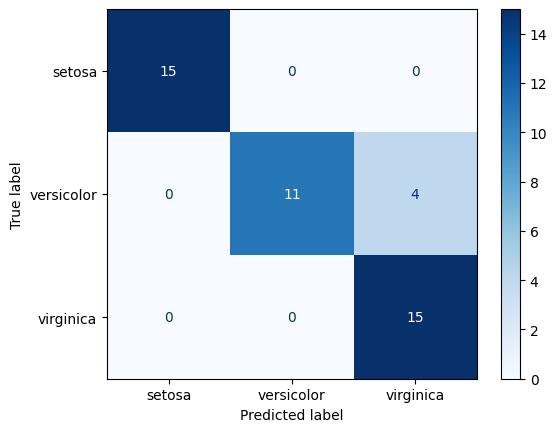

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# データの読み込み
iris = load_iris()

# 特徴量とラベルの分離
X, y = iris.data, iris.target

# 学習データとテストデータに分割 (学習:テスト=7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=43)

# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# モデルの構築
model = MLPClassifier(hidden_layer_sizes=(100,),
                      activation='relu',
                      solver='sgd')

# モデルの学習
model.fit(X_train_std, y_train)

# 予測
predictions = model.predict(X_test_std)

# 評価
print("accuracy:", np.mean(predictions == y_test))

# confusion matrix
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=iris.target_names)
cm_disp.plot(cmap=plt.cm.Blues)
plt.show()